In [1]:
# suraskite, ar yra koreliacija tarp šių parametrų - ridos, kainos, automobilio amžiaus, variklio tūrio. 
# Vizualizuokite tai su heatmap. Su histograma atvaizduokite automobilių amžiaus pasiskirstymą. 
# ar yra priklausomybė tarp butų amžiaus ir kainos? Tarp butų kambarių kiekio ir kainos? 
# Panaudokite heatmap. Su histograma atvaizduokite butų plotų pasiskirstymą. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
import sqlite3
import seaborn as sns

In [3]:
SDB = sqlite3.connect(r'C:\Users\pauli\Desktop\DataScienceNotebooks\Studentai\Paulius Vanagas\aruodas3.db')
Cs = SDB.cursor()
sql="""SELECT * FROM aruododuomenys;"""
Cs.execute(sql)
ans = Cs.fetchall()
df1 = pd.read_sql_query(sql, con=SDB)
df1.head(3)

,plotas,kambariuskaicius,aukstas,aukstuskaicius,metai,pastatotipas,sildymas,irengimas,energetineklase,ilguma,platuma,miestas,kaina,rajonas
0,"34,93 m²",2,5,5,2023,Mūrinis,Centrinis kolektorinis,Įrengtas,None,54.701257,25.272667,Vilnius,173500,Šnipiškės
1,"66,64 m²",2,3,5,2003,Mūrinis,Centrinis,Įrengtas,A,54.705467,25.286944,Vilnius,205000,Žirmūnai
2,"66,89 m²",3,2,9,1980,Blokinis,Centrinis,Įrengtas,None,54.717923,25.238122,Vilnius,172000,Šeškinė


In [4]:
def metukai(x):
    if x is not None and x != 'None':
        return float(x)
    else:
        return None
# df1['plotas']=df1['plotas'].apply(lambda x: float(x.replace('m²', '').replace(',','.').strip()))
df1['metai'] = df1['metai'].apply(lambda x: metukai(x))

In [5]:
df1['amzius']=2024-df1['metai']

In [6]:
df1 = df1.drop(df1['kaina'].idxmax())

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5693 entries, 0 to 5693
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   plotas            5693 non-null   object 
 1   kambariuskaicius  5693 non-null   int64  
 2   aukstas           5693 non-null   int64  
 3   aukstuskaicius    5693 non-null   int64  
 4   metai             5025 non-null   float64
 5   pastatotipas      5693 non-null   object 
 6   sildymas          5693 non-null   object 
 7   irengimas         5693 non-null   object 
 8   energetineklase   951 non-null    object 
 9   ilguma            5638 non-null   float64
 10  platuma           5638 non-null   float64
 11  miestas           5693 non-null   object 
 12  kaina             5693 non-null   int64  
 13  rajonas           5693 non-null   object 
 14  amzius            5025 non-null   float64
dtypes: float64(4), int64(4), object(7)
memory usage: 711.6+ KB


In [8]:
df1[['kaina', 'amzius', 'kambariuskaicius']].corr(numeric_only=True)

,kaina,amzius,kambariuskaicius
kaina,1.000000,-0.194270,0.513379
amzius,-0.194270,1.000000,-0.074774
kambariuskaicius,0.513379,-0.074774,1.000000


<Axes: >

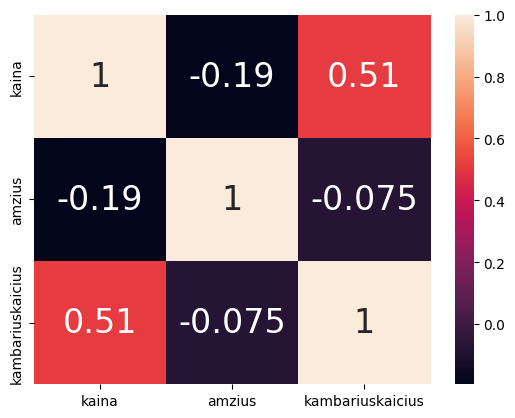

In [9]:
dt=df1[['kaina', 'amzius', 'kambariuskaicius']].corr(numeric_only=True)
sns.heatmap(data=dt,annot=True, annot_kws={'fontsize':24})

(0.0, 150.0)

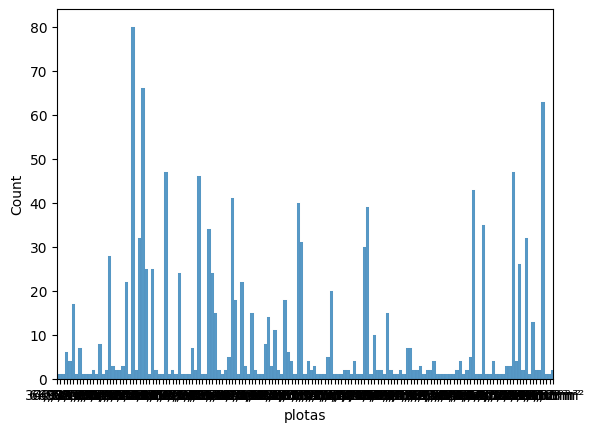

In [27]:
sns.histplot(data=df1, x='plotas', binwidth=5)
plt.xlim(0, 150)

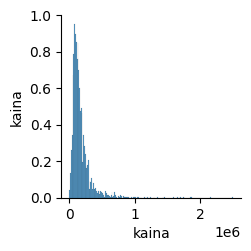

In [26]:
sns.pairplot(data=df1[['kaina', 'plotas']])

In [12]:
SDB = sqlite3.connect(r"C:\Users\pauli\Desktop\DataScienceNotebooks\Studentai\Paulius Vanagas\autopliusvisi.db")
Cs = SDB.cursor()
sql="""SELECT * FROM T1;"""
Cs.execute(sql)
ans = Cs.fetchall()
df2 = pd.read_sql_query(sql, con=SDB)
df2.head(3)

,gamintojas,modelis,kaina,metai,kebulas,kuras,pavaros,galingumas,rida,nuorodos,pirmaregistracija,technikine
0,-Kita-,-kita-,1750.0,2008.0,Krovininis mikroautobusas,Dyzelinas,Mechaninė,None,NaN,https://autoplius.lt/skelbimai/kita-kita-krovi...,None,None
1,-Kita-,-kita-,3900.0,2011.0,Sedanas,Elektra,None,None,10.0,https://autoplius.lt/skelbimai/kita-kita-sedan...,None,None
2,-Kita-,-kita-,6800.0,2020.0,Hečbekas,Elektra,None,29,14000.0,https://autoplius.lt/skelbimai/kita-kita-hecbe...,None,2025-03


In [13]:
def galia(x):
    if x is not None and x != 'None':
        return float(x)
    else:
        return None

df2['galingumas'] = df2['galingumas'].apply(lambda x: galia(x))

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gamintojas         2517 non-null   object 
 1   modelis            2517 non-null   object 
 2   kaina              2475 non-null   float64
 3   metai              2451 non-null   float64
 4   kebulas            2517 non-null   object 
 5   kuras              2517 non-null   object 
 6   pavaros            2441 non-null   object 
 7   galingumas         2371 non-null   float64
 8   rida               2412 non-null   float64
 9   nuorodos           2518 non-null   object 
 10  pirmaregistracija  1295 non-null   object 
 11  technikine         1340 non-null   object 
dtypes: float64(4), object(8)
memory usage: 236.2+ KB


In [15]:
df2[['kaina', 'metai', 'rida','galingumas']].corr(numeric_only=True)

,kaina,metai,rida,galingumas
kaina,1.000000,0.314224,-0.394361,0.631227
metai,0.314224,1.000000,-0.380130,0.190118
rida,-0.394361,-0.380130,1.000000,-0.228714
galingumas,0.631227,0.190118,-0.228714,1.000000


<Axes: >

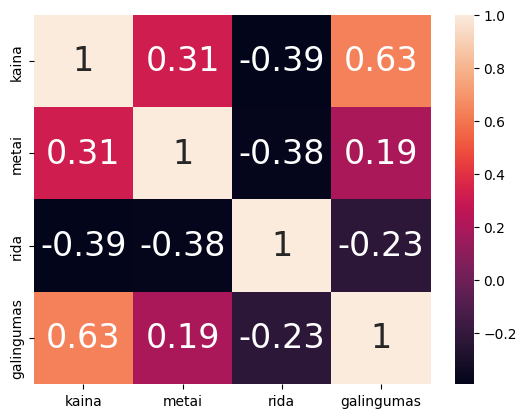

In [16]:
sns.heatmap(data=df2[['kaina', 'metai', 'rida','galingumas']].corr(numeric_only=True),annot=True, annot_kws={'fontsize':24})

(1995.0, 2025.0)

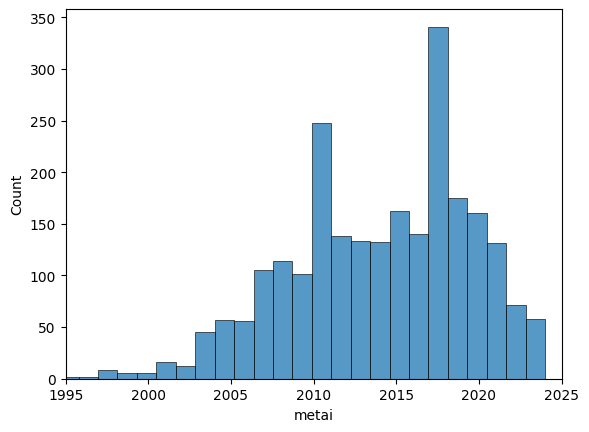

In [17]:
sns.histplot(data=df2, x='metai')
plt.xlim(1995, 2025)

In [18]:
dftop = df2.groupby('gamintojas').count()
dftop = dftop.sort_values(by='kaina', ascending=False)
dftop = dftop.head(3)
top3 = dftop.index.to_list()

print(top3)

['BMW', 'Audi', 'Citroen']


In [19]:
df3 = df2[df2['gamintojas'].isin(top3)]
df3.head()

,gamintojas,modelis,kaina,metai,kebulas,kuras,pavaros,galingumas,rida,nuorodos,pirmaregistracija,technikine
194,Audi,A4,10800.0,2015.0,Sedanas,Benzinas,Automatinė,NaN,161500.0,https://autoplius.lt/skelbimai/audi-a4-2-0-l-s...,None,None
195,Audi,A4 allroad,15999.0,2017.0,Universalas,Dyzelinas,Automatinė,140.0,260000.0,https://autoplius.lt/skelbimai/audi-a4-allroad...,None,2026-09
196,Audi,A6,7450.0,2013.0,Universalas,Dyzelinas,Automatinė,130.0,337200.0,https://autoplius.lt/skelbimai/audi-a6-2-0-l-u...,None,None
197,Audi,A6,12000.0,2011.0,Universalas,Dyzelinas,Automatinė,150.0,347000.0,https://autoplius.lt/skelbimai/audi-a6-3-0-l-u...,None,2025-03
198,Audi,Q8,49500.0,2019.0,Visureigis / Krosoveris,Benzinas,Automatinė,250.0,87000.0,https://autoplius.lt/skelbimai/audi-q8-3-0-l-v...,None,2025


<Axes: xlabel='kaina', ylabel='Count'>

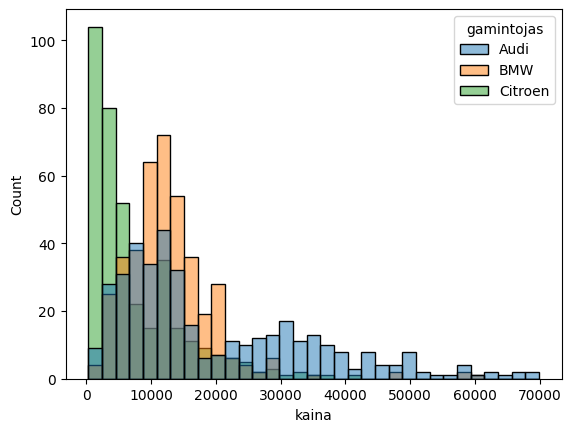

In [20]:
sns.histplot(data=df3, x='kaina', hue = 'gamintojas')
# plt.xlim(1995, 2025)

<Axes: xlabel='kaina', ylabel='Count'>

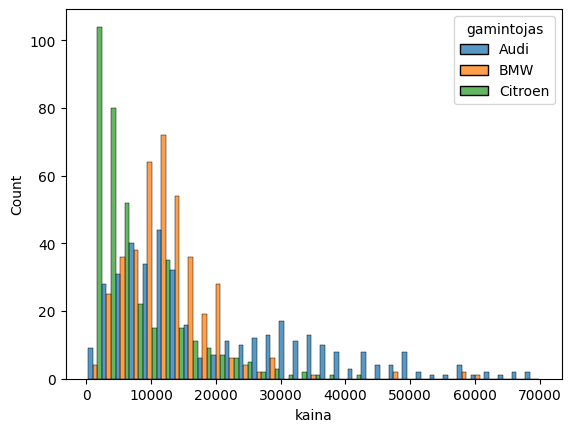

In [21]:
sns.histplot(data=df3, x='kaina', hue = 'gamintojas', multiple='dodge')
# plt.xlim(1995, 2025)

<Axes: xlabel='kaina', ylabel='Count'>

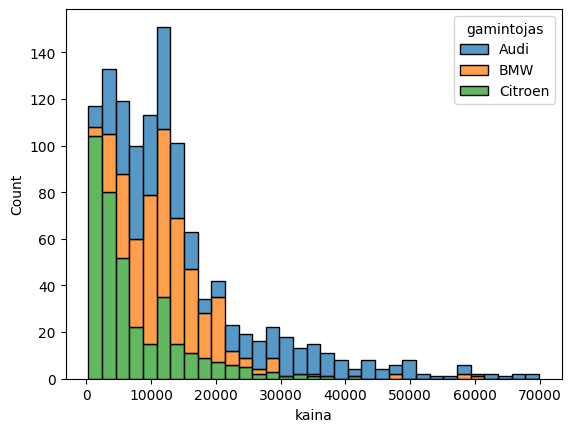

In [22]:
sns.histplot(data=df3, x='kaina', hue = 'gamintojas', multiple='stack')
# plt.xlim(1995, 2025)

<Axes: xlabel='kaina', ylabel='Count'>

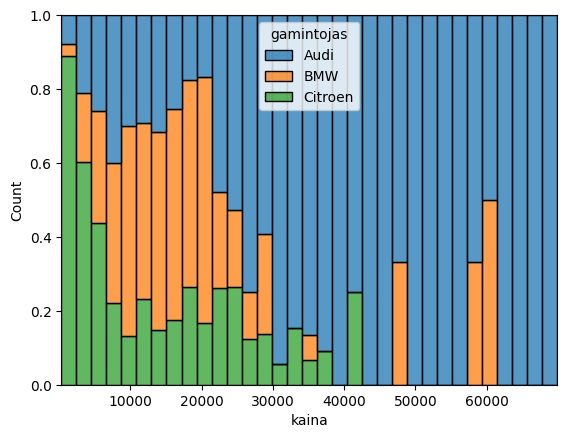

In [23]:
sns.histplot(data=df3, x='kaina', hue = 'gamintojas', multiple='fill')
# plt.xlim(1995, 2025)

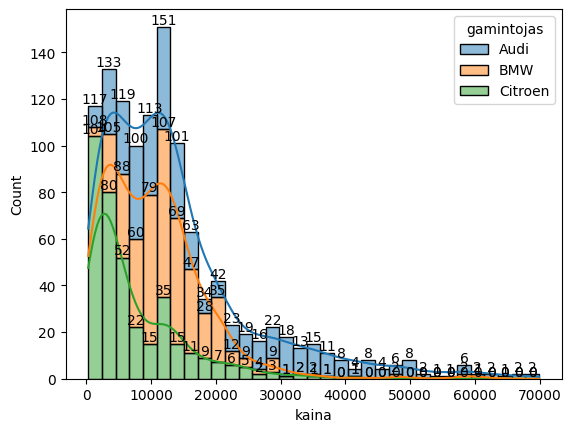

In [24]:
fig, ax = plt.subplots()
sns.histplot(data=df3, x='kaina', kde = True, hue = 'gamintojas', multiple='stack', ax=ax)
# plt.xlim(1995, 2025)
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [25]:
df2 = df2.query("kuras == 'Elektra'")
len(df2)

76

In [30]:
df2.head()

,gamintojas,modelis,kaina,metai,kebulas,kuras,pavaros,galingumas,rida,nuorodos,pirmaregistracija,technikine,ridosintervalai
1,-Kita-,-kita-,3900.0,2011.0,Sedanas,Elektra,None,NaN,10.0,https://autoplius.lt/skelbimai/kita-kita-sedan...,None,None,5000.0
2,-Kita-,-kita-,6800.0,2020.0,Hečbekas,Elektra,None,29.0,14000.0,https://autoplius.lt/skelbimai/kita-kita-hecbe...,None,2025-03,15000.0
3,-Kita-,-kita-,60500.0,2024.0,Krovininis mikroautobusas,Elektra,None,66.0,NaN,https://autoplius.lt/skelbimai/kita-kita-41-kw...,None,None,NaN
16,Aiways,U5,29900.0,2022.0,Visureigis / Krosoveris,Elektra,None,150.0,7900.0,https://autoplius.lt/skelbimai/aiways-u5-63-kw...,Latvija,2025-01,10000.0
17,Aiways,U5,20500.0,2020.0,Visureigis / Krosoveris,Elektra,None,150.0,29500.0,https://autoplius.lt/skelbimai/aiways-u5-63-kw...,Vokietija,2026-09,30000.0


In [29]:
df2['ridosintervalai']=np.ceil(df2['rida']/5000)*5000

In [35]:
df5=df2.groupby('ridosintervalai')['kaina'].mean()

In [36]:
df5.head(50)

ridosintervalai
5000.0      18439.857143
10000.0     18333.545455
15000.0     16516.000000
20000.0     21398.333333
25000.0      7200.000000
30000.0     29800.000000
35000.0     12745.000000
50000.0     40397.250000
55000.0      9800.000000
60000.0     19487.500000
65000.0     24134.600000
75000.0      7900.000000
85000.0     29826.666667
90000.0      6725.000000
105000.0     3500.000000
115000.0    29422.000000
130000.0    16990.000000
160000.0    30855.000000
165000.0    29524.000000
255000.0    25400.000000
Name: kaina, dtype: float64

In [ ]:
df5 = df5.reset_index()
df5.columns = ['rida', 'kaina']

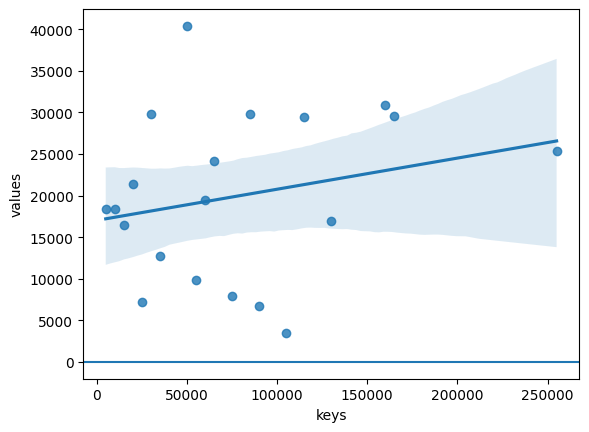

In [39]:
ax=sns.regplot(data=df5, x='keys', y = 'values')
ax.axhline(y=0)
plt.show()